<h1 align = center> Sampling Assignment - UCS654 </h1>

<h3 align = right>  
Vibhav Shukla </br>
102003772 </br>
3CO30 
</h3>

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [66]:
#importing the dataframe
df = pd.read_csv('Creditcard_data.csv')
#drop the time column
df = df.drop(['Time'], axis=1)

## 1. Convert the dataset into a balanced class dataset

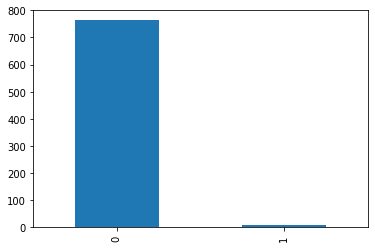

In [88]:
import matplotlib.pyplot as plt
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [67]:
# separate the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
print(y.value_counts())
# create a balanced dataset using SMOTE


0    763
1      9
Name: Class, dtype: int64


##### As visible, the dataset is highly imbalanced. We will use SMOTE to balance the dataset.

In [68]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_new = pd.concat([X_resampled, y_resampled], axis=1)
y_resampled.value_counts()

0    763
1    763
Name: Class, dtype: int64

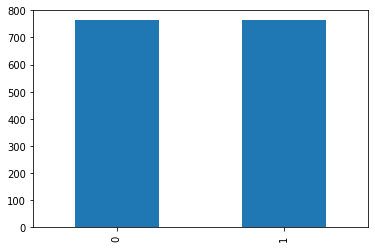

In [91]:
#print the bar graph
df_new['Class'].value_counts().plot(kind='bar')
plt.show()

In [69]:
x_ogtrain, x_ogtest, y_ogtrain, y_ogtest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

## 2. Using 5 Sampling Methods
##### 2.1) Simple Random Sampling

In [70]:
#use simple random sampling to create a balanced dataset
df_simple_random = df.sample(frac=1, random_state=42)
df_simple_random.shape


(772, 30)

##### 2.2) Stratified Sampling

In [71]:
#use stratified sampling to create a balanced dataset
from sklearn.model_selection import StratifiedShuffleSplit
def stratified_sampling(df, n_samples=2):

    sss = StratifiedShuffleSplit(n_splits=1, test_size=n_samples, random_state=42)
    for train_index, test_index in sss.split(df, df['Class']):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
    return strat_test_set



df_stratified = stratified_sampling(df_new, 110)
df_stratified.shape

(110, 30)

##### 2.3) Cluster Sampling

In [72]:
#use Cluster sampling to create a balanced dataset

def cluster_sampling(df2, n_clusters=5, n_samples=2):
    df = df2.copy()
    X = df.drop('Class', axis=1)
    y = df['Class']
    k = n_clusters

    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)

    df['Cluster'] = clusters

    sampled_clusters = np.random.choice(range(k), size=n_samples, replace=False)
    strat_train_set = pd.DataFrame()
    for c in sampled_clusters:
        cluster = df[df['Cluster'] == c]
        n = len(cluster)
        sample = cluster.sample(n // 2, random_state=42)
        strat_train_set = pd.concat([strat_train_set, sample])

    cluster_train_set = strat_train_set.drop('Cluster', axis=1)
    
    return cluster_train_set

df_cluster = cluster_sampling(df_new, n_clusters=5, n_samples=2)


##### 2.4) Systematic Sampling

In [73]:
def systematic_sampling(df_func, step):
 
    indexes = np.arange(0, len(df_func), step=step)
    systematic_sample = df_func.iloc[indexes]
    return systematic_sample

df_systematic = systematic_sampling(df_new, 3)

##### 2.5) Reservoir Sampling

In [74]:
import random

def reservoir_sampling(df, n_samples):
    res = df.iloc[:n_samples, :]
    i = n_samples
    for index, row in df.iterrows():
        if i > n_samples:
            j = random.randint(0, i)
            if j < n_samples:
                res.iloc[j] = row
        else:
            res = res.append(row)
        i += 1
    return res

df_reservoir = reservoir_sampling(df_new, n_samples=110)
df_new.columns

C:\Users\vibha\AppData\Local\Temp\ipykernel_23828\1605643507.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(row)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

## 3) Using 5 different ML models

##### 3.1) Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

def Logistic(X_train, y_train, X_test, y_test):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return accuracy_score(y_test,y_pred)

##### 3.2) Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree(X_train, y_train, X_test, y_test):
  tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
  tree_pred = tree.predict(X_test)
  return accuracy_score(y_test,tree_pred)
     

##### 3.3) Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(X_train, y_train, X_test, y_test):
  clf = RandomForestClassifier(n_estimators = 2)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return accuracy_score(y_test,y_pred)

##### 3.4) KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  return accuracy_score(y_test,knn_pred)

##### 3.5) Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
def NaiveBayes(X_train, y_train, X_test, y_test):
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return accuracy_score(y_test,y_pred)


## 4) Comparing the results

In [80]:
df_results = pd.DataFrame(columns=['Sampling Method', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes'])
sampling_methods = ['Simple Random Sampling', 'Stratified Sampling', 'Cluster Sampling', 'Systematic Sampling', 'Reservoir Sampling']
df_results['Sampling Method'] = sampling_methods

##### 4.1) Simple Random Sampling

In [81]:
#run all the models on the df_simple_random dataset
x_train, x_test, y_train, y_test = train_test_split(df_simple_random.drop('Class', axis=1), df_simple_random['Class'], test_size=0.2, random_state=42)

#add the results to the dataframe and print them
df_results.loc[0, 'Logistic Regression'] = Logistic(x_train, y_train, x_ogtest, y_ogtest)
print('Logistic Regression: ',df_results.loc[0, 'Logistic Regression'])
df_results.loc[0, 'Decision Tree'] = DecisionTree(x_train, y_train, x_ogtest, y_ogtest)
print('Decision Tree: ',df_results.loc[0, 'Decision Tree'])
df_results.loc[0, 'Random Forest'] = RandomForest(x_train, y_train, x_ogtest, y_ogtest)
print('Random Forest: ',df_results.loc[0, 'Random Forest'])
df_results.loc[0, 'KNN'] = KNN(x_train, y_train, x_ogtest, y_ogtest)
print('KNN: ',df_results.loc[0, 'KNN'])
df_results.loc[0, 'Naive Bayes'] = NaiveBayes(x_train, y_train, x_ogtest, y_ogtest)
print('Naive Bayes: ',df_results.loc[0, 'Naive Bayes'])


Logistic Regression:  0.9935483870967742
Decision Tree:  0.9935483870967742
Random Forest:  1.0
KNN:  0.9935483870967742
Naive Bayes:  0.9806451612903225


c:\Users\vibha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 4.2) Stratified Sampling

In [82]:
x_train, x_test, y_train, y_test = train_test_split(df_stratified.drop('Class', axis=1), df_stratified['Class'], test_size=0.2, random_state=42)
#add to the dataframe and print the results
df_results.loc[1, 'Logistic Regression'] = Logistic(x_train, y_train, x_ogtest, y_ogtest)
print('Logistic Regression: ',df_results.loc[1, 'Logistic Regression'])
df_results.loc[1, 'Decision Tree'] = DecisionTree(x_train, y_train, x_ogtest, y_ogtest)
print('Decision Tree: ',df_results.loc[1, 'Decision Tree'])
df_results.loc[1, 'Random Forest'] = RandomForest(x_train, y_train, x_ogtest, y_ogtest)
print('Random Forest: ',df_results.loc[1, 'Random Forest'])
df_results.loc[1, 'KNN'] = KNN(x_train, y_train, x_ogtest, y_ogtest)
print('KNN: ',df_results.loc[1, 'KNN'])
df_results.loc[1, 'Naive Bayes'] = NaiveBayes(x_train, y_train, x_ogtest, y_ogtest)
print('Naive Bayes: ',df_results.loc[1, 'Naive Bayes'])

Logistic Regression:  0.6967741935483871
Decision Tree:  0.7870967741935484
Random Forest:  0.9354838709677419
KNN:  0.7741935483870968
Naive Bayes:  0.8258064516129032


c:\Users\vibha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 4.3) Cluster Sampling

In [83]:
x_train, x_test, y_train, y_test = train_test_split(df_cluster.drop('Class', axis=1), df_cluster['Class'], test_size=0.2, random_state=42)
#add to the dataframe and print the results
df_results.loc[2, 'Logistic Regression'] = Logistic(x_train, y_train, x_ogtest, y_ogtest)
print('Logistic Regression: ',df_results.loc[1, 'Logistic Regression'])
df_results.loc[2, 'Decision Tree'] = DecisionTree(x_train, y_train, x_ogtest, y_ogtest)
print('Decision Tree: ',df_results.loc[1, 'Decision Tree'])
df_results.loc[2, 'Random Forest'] = RandomForest(x_train, y_train, x_ogtest, y_ogtest)
print('Random Forest: ',df_results.loc[1, 'Random Forest'])
df_results.loc[2, 'KNN'] = KNN(x_train, y_train, x_ogtest, y_ogtest)
print('KNN: ',df_results.loc[1, 'KNN'])
df_results.loc[2, 'Naive Bayes'] = NaiveBayes(x_train, y_train, x_ogtest, y_ogtest)
print('Naive Bayes: ',df_results.loc[1, 'Naive Bayes'])

Logistic Regression:  0.6967741935483871
Decision Tree:  0.7870967741935484
Random Forest:  0.9354838709677419
KNN:  0.7741935483870968
Naive Bayes:  0.8258064516129032


c:\Users\vibha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 4.4) Systematic Sampling

In [84]:
x_train, x_test, y_train, y_test = train_test_split(df_stratified.drop('Class', axis=1), df_stratified['Class'], test_size=0.2, random_state=42)
#add to the dataframe and print the results
df_results.loc[3, 'Logistic Regression'] = Logistic(x_train, y_train, x_ogtest, y_ogtest)
print('Logistic Regression: ',df_results.loc[1, 'Logistic Regression'])
df_results.loc[3, 'Decision Tree'] = DecisionTree(x_train, y_train, x_ogtest, y_ogtest)
print('Decision Tree: ',df_results.loc[1, 'Decision Tree'])
df_results.loc[3, 'Random Forest'] = RandomForest(x_train, y_train, x_ogtest, y_ogtest)
print('Random Forest: ',df_results.loc[1, 'Random Forest'])
df_results.loc[3, 'KNN'] = KNN(x_train, y_train, x_ogtest, y_ogtest)
print('KNN: ',df_results.loc[1, 'KNN'])
df_results.loc[3, 'Naive Bayes'] = NaiveBayes(x_train, y_train, x_ogtest, y_ogtest)
print('Naive Bayes: ',df_results.loc[1, 'Naive Bayes'])

Logistic Regression:  0.6967741935483871
Decision Tree:  0.7870967741935484
Random Forest:  0.9354838709677419
KNN:  0.7741935483870968
Naive Bayes:  0.8258064516129032


c:\Users\vibha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 4.5) Reservoir Sampling

In [85]:
x_train, x_test, y_train, y_test = train_test_split(df_reservoir.drop('Class', axis=1), df_reservoir['Class'], test_size=0.2, random_state=42)
#add to the dataframe and print the results
print(x_ogtest.shape, x_test.shape, y_train.shape, y_test.shape)
df_results.loc[4, 'Logistic Regression'] = Logistic(x_train, y_train, x_ogtest, y_ogtest)
print('Logistic Regression: ',df_results.loc[1, 'Logistic Regression'])
df_results.loc[4, 'Decision Tree'] = DecisionTree(x_train, y_train, x_ogtest, y_ogtest)
print('Decision Tree: ',df_results.loc[1, 'Decision Tree'])
df_results.loc[4, 'Random Forest'] = RandomForest(x_train, y_train, x_ogtest, y_ogtest)
print('Random Forest: ',df_results.loc[1, 'Random Forest'])
df_results.loc[4, 'KNN'] = KNN(x_train, y_train, x_ogtest, y_ogtest)
print('KNN: ',df_results.loc[1, 'KNN'])

df_results.loc[4, 'Naive Bayes'] = NaiveBayes(x_train, y_train, x_ogtest, y_ogtest)
print('Naive Bayes: ',df_results.loc[1, 'Naive Bayes'])
df_results = df_results.iloc[:, :6]

(155, 29) (23, 29) (88,) (23,)
Logistic Regression:  0.6967741935483871
Decision Tree:  0.7870967741935484
Random Forest:  0.9354838709677419
KNN:  0.7741935483870968
Naive Bayes:  0.8258064516129032


c:\Users\vibha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Final Results #####

In [86]:
df_results.head()

,Sampling Method,Logistic Regression,Decision Tree,Random Forest,KNN,Naive Bayes
0,Simple Random Sampling,0.993548,0.993548,1.0,0.993548,0.980645
1,Stratified Sampling,0.696774,0.787097,0.935484,0.774194,0.825806
2,Cluster Sampling,0.83871,0.987097,0.987097,0.980645,0.993548
3,Systematic Sampling,0.696774,0.787097,0.8,0.774194,0.825806
4,Reservoir Sampling,0.819355,0.83871,0.941935,0.8,0.703226
